## Is Draft Position  an Accurate Predictor of Player Potential

Each NBA Draft there are 2 rounds and 30 picks in each Round
Teams generally draft best player available
However, every draft there are always players who drop in the draft
And are considered steals.

With this question we want to find correlation between draft slots and player potential

We will use BPM, WS/48, Vorp, and PER as metrics to measure career success

Data will be gathered from the 10 most recent NBA Drafts in which players have completed a minimum of 4 seasons
That range will span from 2007-2016

BPM:
BPM is a basketball box score-based metric that estimates a basketball player’s contribution to the team when that player is on the court

WS/48:
Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team per 48 min.


VORP:
(Value over replacement player) Converts the value of the Box Plus Minus into an estimate of the player’s contribution, which is parameterized with respect to the Replacement Player

PER:
PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance.

After conclusions are gathered from Data a linear regression will be used on each statistic to conclude how accurate the draft is at predicting player potential

## DataSets

In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import dataframe_image as dfi

In [39]:
Draft_2007 = pd.read_csv('Draft_2007.txt',delimiter=",")
Draft_2008 = pd.read_csv('Draft_2008.txt',delimiter=",")
Draft_2009 = pd.read_csv('Draft_2009.txt',delimiter=",")
Draft_2010 = pd.read_csv('Draft_2010.txt',delimiter=",")
Draft_2011 = pd.read_csv('Draft_2011.txt',delimiter=",")
Draft_2012 = pd.read_csv('Draft_2012.txt',delimiter=",")
Draft_2013 = pd.read_csv('Draft_2013.txt',delimiter=",")
Draft_2014 = pd.read_csv('Draft_2014.txt',delimiter=",")
Draft_2015 = pd.read_csv('Draft_2015.txt',delimiter=",")
Draft_2016 = pd.read_csv('Draft_2016.txt',delimiter=",")

In [40]:
#DataFrame for Advanced stats for the 2007 Draft Class
Draft_2007 = Draft_2007.drop(0)

In [5]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2007 = pd.DataFrame(Draft_2007, columns = cols)
Draft_2007.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,Greg Oden,-0.4,0.174,0.8
2,2.0,Kevin Durant,6.8,0.216,76.4
3,3.0,Al Horford,2.9,0.157,37.9
4,4.0,Mike Conley,2.5,0.136,34.8
5,5.0,Jeff Green,-1.4,0.079,4.8


In [6]:
#DataFrame for Advanced stats for the 2008 Draft Class
Draft_2008 = Draft_2008.drop(0)

In [7]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2008 = pd.DataFrame(Draft_2008, columns = cols)
Draft_2008.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,Derrick Rose,1.4,0.100,18.5
2,2.0,Michael Beasley,-1.7,0.054,0.9
3,3.0,O.J. Mayo,-0.9,0.062,4.7
4,4.0,Russell Westbrook,4.3,0.144,55.8
5,5.0,Kevin Love,3.4,0.170,34.0


In [8]:
#DataFrame for Advanced stats for the 2009 Draft Class
Draft_2009 = Draft_2009.drop(0)

In [9]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2009 = pd.DataFrame(Draft_2009, columns = cols)
Draft_2009.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,Blake Griffin,3.4,0.160,32.5
2,2.0,Hasheem Thabeet,-2.7,0.099,-0.4
3,3.0,James Harden,6.8,0.220,72.0
4,4.0,Tyreke Evans,0.8,0.075,13.1
5,5.0,Ricky Rubio,0.6,0.099,13.4


In [10]:
#DataFrame for Advanced stats for the 2010 Draft Class
Draft_2010 = Draft_2010.drop(0)

In [11]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2010 = pd.DataFrame(Draft_2010, columns = cols)
Draft_2010.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,John Wall,2.4,0.097,24.0
2,2.0,Evan Turner,-1.9,0.051,0.5
3,3.0,Derrick Favors,0.9,0.150,14.0
4,4.0,Wesley Johnson,-1.6,0.038,1.2
5,5.0,DeMarcus Cousins,2.4,0.115,21.6


In [12]:
#DataFrame for Advanced stats for the 2011 Draft Class
Draft_2011 = Draft_2011.drop(0)

In [13]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2011 = pd.DataFrame(Draft_2011, columns = cols)
Draft_2011.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,Kyrie Irving,4.5,0.166,34.2
2,2.0,Derrick Williams,-1.6,0.076,0.8
3,3.0,Enes Freedom,-0.1,0.157,7.6
4,4.0,Tristan Thompson,-1.7,0.117,1.4
5,5.0,Jonas Valančiūnas,1.1,0.178,14.3


In [14]:
#DataFrame for Advanced stats for the 2012 Draft Class
Draft_2012 = Draft_2012.drop(0)

In [15]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2012 = pd.DataFrame(Draft_2012, columns = cols)
Draft_2012.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,Anthony Davis,6.0,0.211,42.1
2,2.0,Michael Kidd-Gilchrist,-1.8,0.092,0.6
3,3.0,Bradley Beal,1.7,0.104,21.0
4,4.0,Dion Waiters,-2.1,0.036,-0.4
5,5.0,Thomas Robinson,-3.5,0.053,-1.6


In [16]:
#DataFrame for Advanced stats for the 2013 Draft Class
Draft_2013 = Draft_2013.drop(0)

In [17]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2013 = pd.DataFrame(Draft_2013, columns = cols)
Draft_2013.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,Anthony Bennett,-4.8,0.013,-1.3
2,2.0,Victor Oladipo,0.9,0.080,11.0
3,3.0,Otto Porter Jr.,1.8,0.132,12.5
4,4.0,Cody Zeller,-0.6,0.140,4.0
5,5.0,Alex Len,-1.9,0.096,0.2


In [18]:
#DataFrame for Advanced stats for the 2014 Draft Class
Draft_2014 = Draft_2014.drop(0)

In [19]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2014 = pd.DataFrame(Draft_2014, columns = cols)
Draft_2014.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,Andrew Wiggins,-1.5,0.055,2.6
2,2.0,Jabari Parker,-0.8,0.078,2.5
3,3.0,Joel Embiid,5.9,0.205,20.4
4,4.0,Aaron Gordon,-0.1,0.090,7.3
5,5.0,Dante Exum,-3.3,0.032,-1.5


In [20]:
#DataFrame for Advanced stats for the 2015 Draft Class
Draft_2015 = Draft_2015.drop(0)

In [21]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2015 = pd.DataFrame(Draft_2015, columns = cols)
Draft_2015.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,Karl-Anthony Towns,4.8,0.193,28.3
2,2.0,D'Angelo Russell,0.5,0.055,8.0
3,3.0,Jahlil Okafor,-2.0,0.071,0.0
4,4.0,Kristaps Porziņģis,1.7,0.125,9.6
5,5.0,Mario Hezonja,-2.8,0.025,-1.2


In [22]:
#DataFrame for Advanced stats for the 2016 Draft Class
Draft_2016 = Draft_2016.drop(0)

In [23]:
cols = ["Pk","Player","BPM","WS/48","VORP"]
Draft_2016 = pd.DataFrame(Draft_2016, columns = cols)
Draft_2016.head()

,Pk,Player,BPM,WS/48,VORP
1,1.0,Ben Simmons,3.7,0.156,13.5
2,2.0,Brandon Ingram,-0.3,0.074,5.2
3,3.0,Jaylen Brown,0.1,0.102,6.1
4,4.0,Dragan Bender,-3.9,0.006,-1.9
5,5.0,Kris Dunn,-2.1,0.031,-0.2


In [24]:
#Merged DataFrame and averaged each pick
df = pd.concat([Draft_2007, Draft_2008,Draft_2009,Draft_2010,Draft_2011,Draft_2012,Draft_2013,Draft_2014,Draft_2015,Draft_2016], axis=0)
df = df.sort_values(by=['Pk'],ascending=True)
df = df.groupby('Pk', as_index=False).mean()
dfi.export(df.head(10),'dataframe.png')
df.head()

[0531/073914.813311:INFO:headless_shell.cc(660)] Written to file /var/folders/wx/pnzp2mcx6dn3bpbrl16v7f3w0000gn/T/tmp8xehrt4f/temp.png.


,Pk,BPM,WS/48,VORP
0,1.0,1.95,0.1325,19.52
1,2.0,-0.26,0.0875,10.55
2,3.0,1.71,0.1360,19.62
3,4.0,-0.07,0.0907,12.49
4,5.0,-0.75,0.0878,8.38


## Analyses

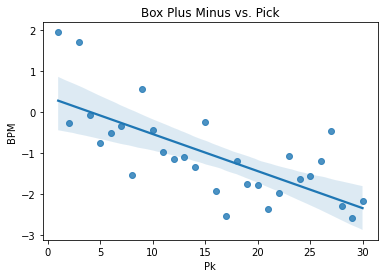

In [434]:
 #BPM Linear Regression, Slope, and R2
sns.regplot(x="Pk", y="BPM", data=df).set(title='Box Plus Minus vs. Pick')
plt.savefig("BPM_plot.png", format="png", bbox_inches="tight")

In [435]:
X=df['Pk'].values
Y=df['BPM'].values

In [436]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [437]:
Y_pred = lin_reg(X,Y)

-0.0903633667037449 0.3714840357598981


In [438]:
model = LinearRegression()
X, y = df[["Pk", "BPM"]],df
model.fit(X, y)
r_squared = model.score(X, y)
print("R2 = ",r_squared)

R2 =  0.9447329917697826


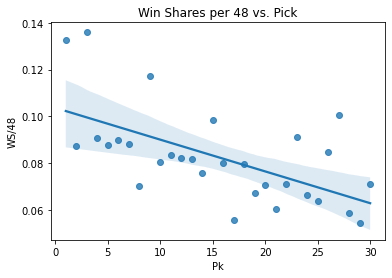

In [439]:
 #WS/48 Linear Regression, Slope, and R2
sns.regplot(x="Pk", y="WS/48", data=df).set(title='Win Shares per 48 vs. Pick')
plt.savefig('WS_plot.png')

In [440]:
X=df['Pk'].values
Y=df['WS/48'].values

In [441]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [442]:
Y_pred = lin_reg(X,Y)

-0.0013590804597701151 0.10365389527458492


In [443]:
model = LinearRegression()
X, y = df[["Pk", "WS/48"]],df
model.fit(X, y)
r_squared = model.score(X, y)
print("R2 = ",r_squared)

R2 =  0.9399817143330786


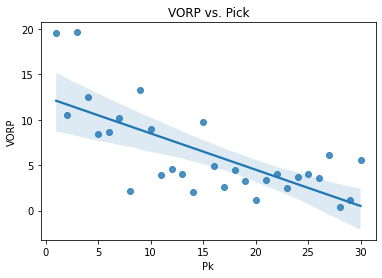

In [444]:
 #VORP Linear Regression, Slope, and R2
sns.regplot(x="Pk", y="VORP", data=df).set(title='VORP vs. Pick')
plt.savefig('VORP_plot.png')

In [445]:
X=df['Pk'].values
Y=df['VORP'].values

In [446]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [447]:
Y_pred = lin_reg(X,Y)

-0.3990723025583983 12.480176245210728


In [448]:
model = LinearRegression()
X, y = df[["Pk", "VORP"]],df
model.fit(X, y)
r_squared = model.score(X, y)
print("R2 = ",r_squared)

R2 =  0.9066758376385264


## Conclusion

All the slopes were negative meaning there is a negative correlation between the two variables of each graph. in terms of our data this means the as pick increases (the lower the pick) The metric being measured decreases. The R2 value for each graph was above 0.9 which means our linear regression was over 90 percent accurate showing a strong relationship in the negative correlation of our variables.

So in conclusion draft position is an accurate predictor of how great a player will be